# Exercise: Monthly Job Demand 

In [ ]:
#demand of certain job titles over a year in the UK 

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
## Skill count per month for data analysts
df_UK = df[df['job_country'] == 'United Kingdom'].copy()

In [3]:
#extract month values from the dataframe 

In [5]:
# extract the month name from 'job_posted_date'
df_UK['job_posted_month'] = df_UK['job_posted_date'].dt.strftime('%B') #string formatter with month full name 

In [7]:
df_UK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
15,Data Engineer,Data Engineer,"Aberdeen, UK",via LinkedIn,Temp work,False,United Kingdom,2023-10-19 13:37:16,False,False,United Kingdom,None,NaN,NaN,Orion Group,"['python', 'sql', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",October
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,"['sql', 'python']","{'programming': ['sql', 'python']}",May
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,NaN,ttgTalentSolutions,"['sql', 'r', 'python', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",November
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None,December
152,Data Scientist,Data Science Team Lead,Anywhere,via OnlyDataJobs,Full-time,True,United Kingdom,2023-12-23 13:12:16,False,False,United Kingdom,None,NaN,NaN,StepStone Group,"['react', 'docker']","{'libraries': ['react'], 'other': ['docker']}",December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785485,Data Analyst,Data Quality Analyst,Anywhere,via LinkedIn,Full-time,True,United Kingdom,2023-10-04 06:09:44,False,False,United Kingdom,None,NaN,NaN,Viatris,"['sql', 'sql server', 'excel', 'powerpoint']","{'analyst_tools': ['excel', 'powerpoint'], 'da...",October
785513,Data Scientist,Data Scientist,"Glasgow, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:21,False,False,United Kingdom,None,NaN,NaN,ASA Recruitment,"['r', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",January
785522,Data Engineer,Lead Data Engineer,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-19 06:16:45,True,False,United Kingdom,None,NaN,NaN,bionic-services-ltd,"['sql', 'python', 'sql server', 'aws', 'snowfl...","{'analyst_tools': ['ssis'], 'cloud': ['aws', '...",January
785642,Data Engineer,Submission for the position: Data Engineer Sen...,"England, UK",via BAE Systems - Talentify,Full-time,False,United Kingdom,2023-01-02 06:31:23,True,False,United Kingdom,None,NaN,NaN,BAE Systems - UK,"['python', 'vue', 'ssis', 'ssrs', 'qlik', 'con...","{'analyst_tools': ['ssis', 'ssrs', 'qlik'], 'a...",January


In [10]:
df_UK_pivot = df_UK.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size') 
# Size counts how many job_title_shorts there are


In [12]:
df_UK_pivot # in alphabeticall order 

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,29,7,561,611,519,8,63,155,123,18
August,22,7,610,863,657,15,96,247,181,13
December,124,31,712,1034,752,78,110,213,194,97
February,23,4,1051,1009,859,10,140,301,212,10
January,46,3,1467,1253,1142,8,169,347,326,20
July,38,5,892,960,646,13,116,321,184,12
June,14,2,736,862,636,3,102,292,154,4
March,47,5,712,789,699,8,91,224,179,19
May,23,1,614,645,486,11,60,227,153,16


In [15]:
# sort job_posted_month_name in df_UK_pivot by job_posted_month value
df_UK_pivot = df_UK_pivot.reset_index() 
df_UK_pivot['job_posted_month_no'] = pd.to_datetime(df_UK_pivot['job_posted_month'], format='%B').dt.month
df_UK_pivot = df_UK_pivot.sort_values('job_posted_month_no') # sort values by the month number 
df_UK_pivot = df_UK_pivot.set_index('job_posted_month') #sorts by the month but stull has month_no column 
df_UK_pivot = df_UK_pivot.drop(columns='job_posted_month_no')


In [14]:
df_UK_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20
February,23,4,1051,1009,859,10,140,301,212,10
March,47,5,712,789,699,8,91,224,179,19
April,29,7,561,611,519,8,63,155,123,18
May,23,1,614,645,486,11,60,227,153,16
June,14,2,736,862,636,3,102,292,154,4
July,38,5,892,960,646,13,116,321,184,12
August,22,7,610,863,657,15,96,247,181,13
September,111,32,1112,1191,898,51,139,320,221,116


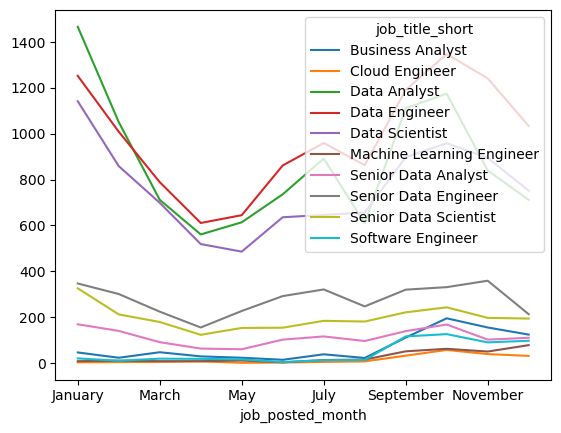

In [26]:
df_UK_pivot.plot(kind='line')#
plt.show()

In [20]:
top_3 = df_UK['job_title_short'].value_counts().head(3)
top_3

job_title_short
Data Engineer     11807
Data Analyst      10482
Data Scientist     9148
Name: count, dtype: int64

In [21]:
top_3 = df_UK['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3 # Gives top 3 jobs 

['Data Engineer', 'Data Analyst', 'Data Scientist']

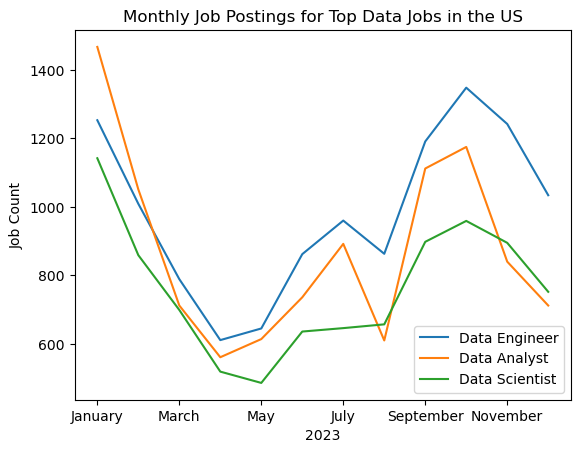

In [23]:
df_UK_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

In [25]:
#Job postings increase near September to November
#January job postings are the highest. New budgets are approved so ramp  up hiring 